In [1]:
from gwpy.timeseries import TimeSeries

In [7]:
thunder_gps = 1244750468    # GPS time of the thunderstorm

window = 64  # seconds
start = thunder_gps - window
end = thunder_gps + window

strain_data = TimeSeries.fetch('L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01_AR', 
                        start=start, end=end, host='losc-nds.ligo.org').resample(4096)
aux_data = TimeSeries.fetch('L1:PEM-EY_MIC_VEA_PLUSY_DQ', 
                        start=start, end=end, host='losc-nds.ligo.org').resample(4096)

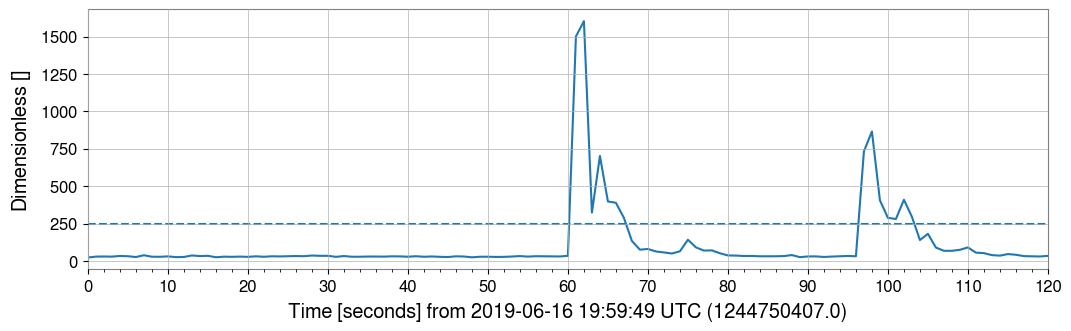

In [8]:
flower = 10
fupper = 100
step = 1
threshold = 250 
aux_blrms = aux_data.bandpass(flower, fupper, fstop=[flower/2., fupper*1.5], 
                              filtfilt=False, ftype='butter').crop(
                              aux_data.times.value[0]+3, aux_data.times.value[-1]-3).rms(step)
plot = aux_blrms.plot()
ax = plot.gca()
ax.axhline(threshold, ls='--')
plot.show()

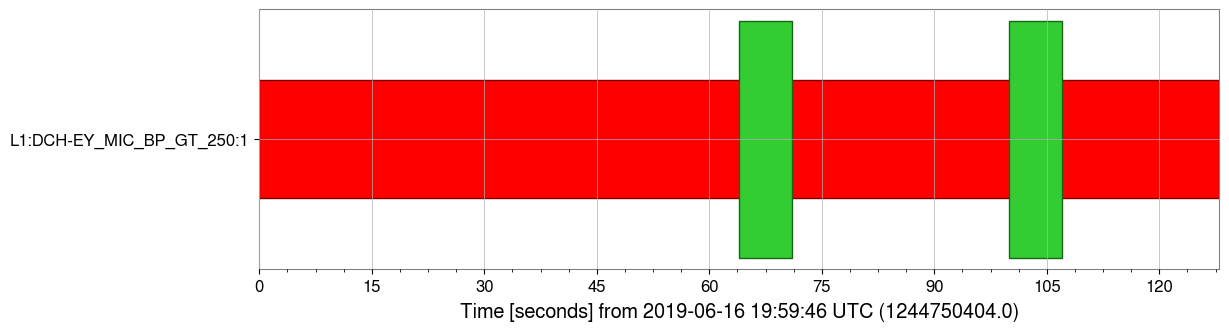

In [9]:
from gwpy.segments import DataQualityFlag, Segment, SegmentList

# find times above threshold
times = aux_blrms.times[aux_blrms.value > threshold]

# put in to segment list and coalesce
segs = SegmentList()
segs.extend([Segment(int(t.value), int(t.value)+step) for t in times])
segs = segs.coalesce()

# set up the xml file
start_time = []
start_time.extend([t[0] for t in segs])
end_time = []
end_time.extend([t[1] for t in segs])

flag_name = 'L1:DCH-EY_MIC_BP_GT_250:1'

# put in to dq flag
flag = DataQualityFlag(flag_name, 
                       active=zip(start_time,end_time), 
                       known=[[start,end]])
flag.plot().show()

/home/gui/miniconda3/envs/GW/lib/python3.12/site-packages/gwpy/plot/plot.py:287: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  super().show(warn=warn)


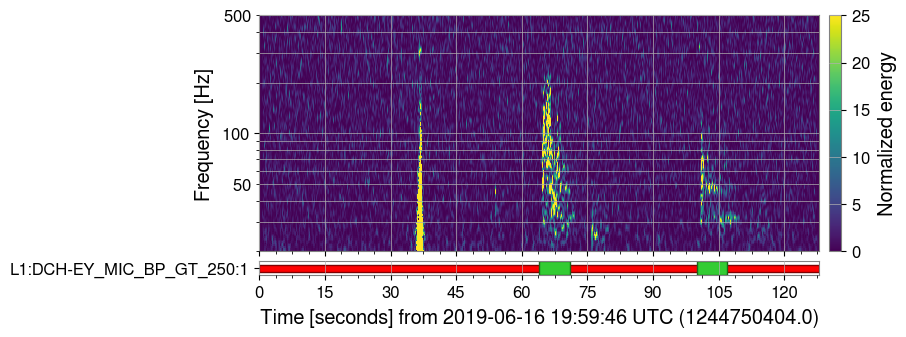

In [10]:
plot_window = 32
strain_data_crop = strain_data.crop(thunder_gps-2*plot_window, thunder_gps+2*plot_window)
qspecgram_strain = strain_data_crop.q_transform(qrange=(30,40), frange=(20, 500), 
                                                outseg=(thunder_gps-2*plot_window, 
                                                        thunder_gps+2*plot_window))

plot = qspecgram_strain.plot(figsize=[8, 4])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(20, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy', clim=[0,25])
ax.set_xlim(thunder_gps-2*plot_window, thunder_gps+2*plot_window)
plot.add_segments_bar(flag)
plot.show()

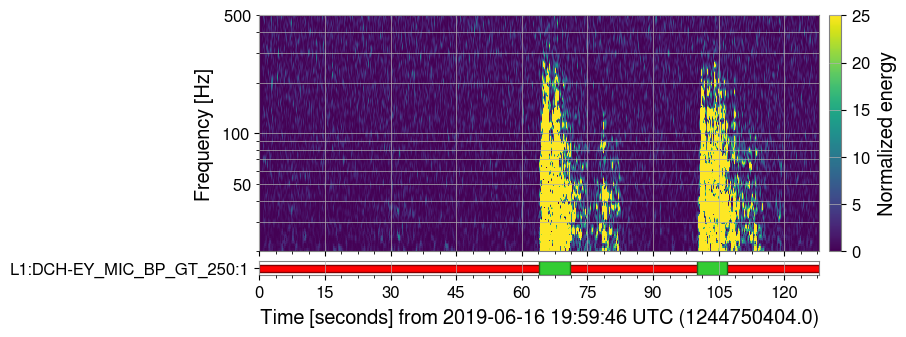

In [11]:
aux_data_crop = aux_data.crop(thunder_gps-2*plot_window, thunder_gps+2*plot_window)
qspecgram_aux = aux_data_crop.q_transform(qrange=(30,40), frange=(20, 500), 
                                          outseg=(thunder_gps-2*plot_window, 
                                                  thunder_gps+2*plot_window))

plot = qspecgram_aux.plot(figsize=[8, 4])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(20, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy', clim=[0,25])
ax.set_xlim(thunder_gps-2*plot_window, thunder_gps+2*plot_window)
plot.add_segments_bar(flag)
plot.show()